In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df_train=pd.read_csv('bigdata_train.csv')
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2031,FDD47,7.60,Regular,0.142384,Starchy Foods,172.3448,OUT035,2004,Small,Tier 2,Supermarket Type1,2556.6720
5604,NCQ38,NaN,LF,0.023403,Others,108.2280,OUT019,1985,Small,Tier 1,Grocery Store,213.0560
165,DRL01,19.50,Regular,0.077609,Soft Drinks,233.4958,OUT017,2007,NaN,Tier 2,Supermarket Type1,5375.0034
8401,FDM02,12.50,Regular,0.074152,Canned,88.6198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1395.5168
3695,NCH42,6.86,Low Fat,0.061156,Household,228.4010,OUT010,1998,NaN,Tier 3,Grocery Store,229.7010


In [3]:
df_test=pd.read_csv('bigdata_test.csv')
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2522,FDX59,10.195,Low Fat,0.086470,Breads,33.6558,OUT010,1998,NaN,Tier 3,Grocery Store
5476,FDS15,9.195,Regular,0.078379,Meat,108.0596,OUT018,2009,Medium,Tier 3,Supermarket Type2
3221,NCM30,19.100,Low Fat,0.067432,Household,42.4796,OUT045,2002,NaN,Tier 2,Supermarket Type1
4179,FDO45,13.150,Regular,0.037946,Snack Foods,89.1856,OUT035,2004,Small,Tier 2,Supermarket Type1
1330,FDQ12,12.650,Low Fat,0.035381,Baking Goods,230.7010,OUT013,1987,High,Tier 3,Supermarket Type1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

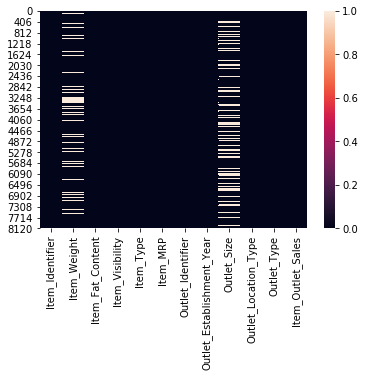

In [9]:
sns.heatmap(df_train.isnull())

By this we can see that their is lots of missing values in two columns . So we will treat it in further steps.

In [10]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

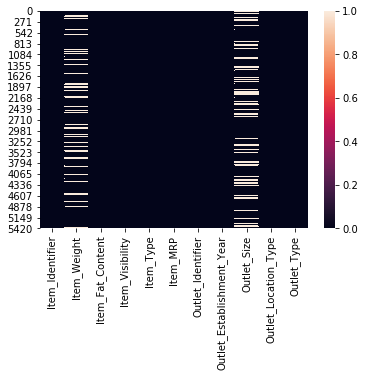

In [11]:
sns.heatmap(df_test.isnull())

In [12]:
cat_df=df_train.select_dtypes(include="object")
num_df=df_train.select_dtypes(exclude="object")
print(f"There are ",len(cat_df.columns)," number of Categorical Attributes:")
print(f"There are ",len(num_df.columns)," number of Numerical Attributes:")

There are  7  number of Categorical Attributes:
There are  5  number of Numerical Attributes:


## Removing Null Values:-

In [13]:
# cat_mean=df_train.groupby('Item_Type')['Item_Weight'].mean()
# for i in range(len(cat_mean)):
#     c1=(df_train['Item_Type']==cat_mean.index[i])&(df_train['Item_Weight'].isna()==True)
#     df_train['Item_Weight']=np.select([c1],[cat_mean.index[i]],df_train['Item_Weight'])

In [14]:
# cat_mean_test=df_test.groupby('Item_Type')['Item_Weight'].mean()
# for i in range(len(cat_mean_test)):
#     c1=(df_test['Item_Type']==cat_mean_test.index[i])&(df_test['Item_Weight'].isna()==True)
#     df_test['Item_Weight']=np.select([c1],[cat_mean_test.index[i]],df_test['Item_Weight'])

In [15]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [16]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [17]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)

Since it is a Categorical Column We will remove the Null Values by Replacing the null values with mode.

In [18]:
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0],inplace=True)

Since it is a Numeric Value We will remove the Null values by Replacing it with the median.

In [19]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now the Null Values are Removed so we will do the Exploratory Data Analysis.

# EDA:-

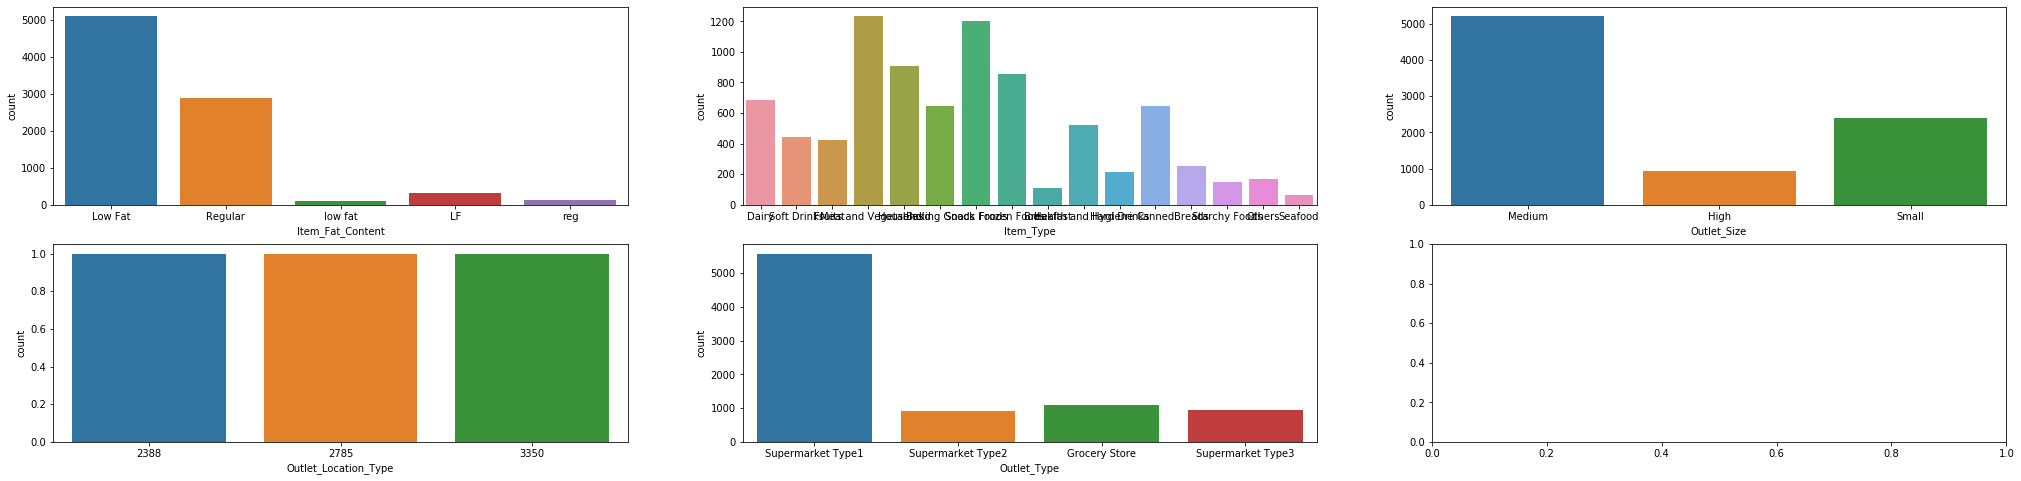

In [21]:
fig,ax=plt.subplots(2,3,figsize=(35,8))
sns.countplot(df_train['Item_Fat_Content'],ax=ax[0,0])
sns.countplot(df_train['Item_Type'],ax=ax[0,1])
sns.countplot(df_train['Outlet_Size'],ax=ax[0,2])
sns.countplot(df_train['Outlet_Location_Type'].value_counts(),ax=ax[1,0])
sns.countplot(df_train['Outlet_Type'],ax=ax[1,1])

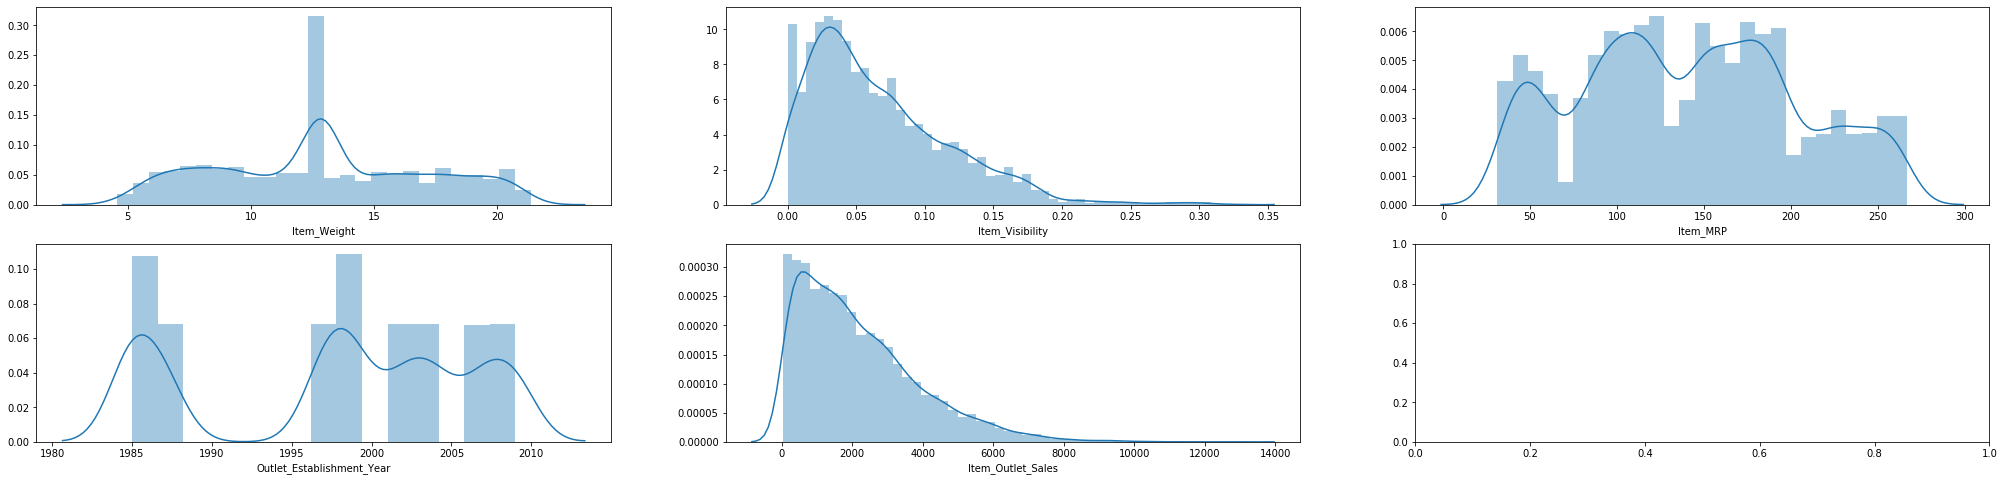

In [22]:
fig,ax=plt.subplots(2,3,figsize=(35,8))
sns.distplot(df_train['Item_Weight'],ax=ax[0,0])
sns.distplot(df_train['Item_Visibility'],ax=ax[0,1])
sns.distplot(df_train['Item_MRP'],ax=ax[0,2])
sns.distplot(df_train['Outlet_Establishment_Year'],ax=ax[1,0])
sns.distplot(df_train['Item_Outlet_Sales'],ax=ax[1,1])

In [23]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


We can observe that there is some Outliers in the dataset.

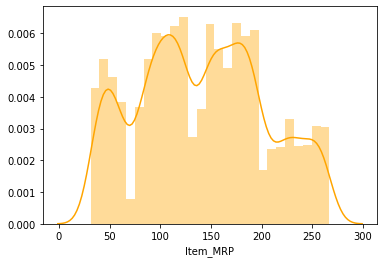

In [25]:
sns.distplot(df_train["Item_MRP"],color='orange')

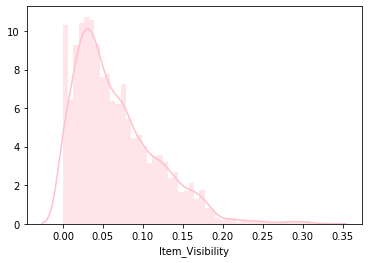

In [26]:
sns.distplot(df_train["Item_Visibility"],color='pink')

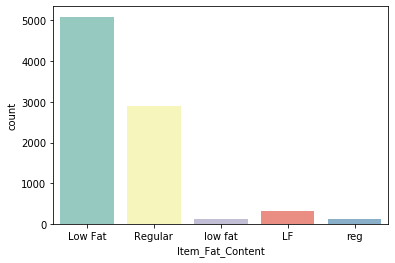

In [27]:
sns.countplot(df_train["Item_Fat_Content"],palette='Set3')

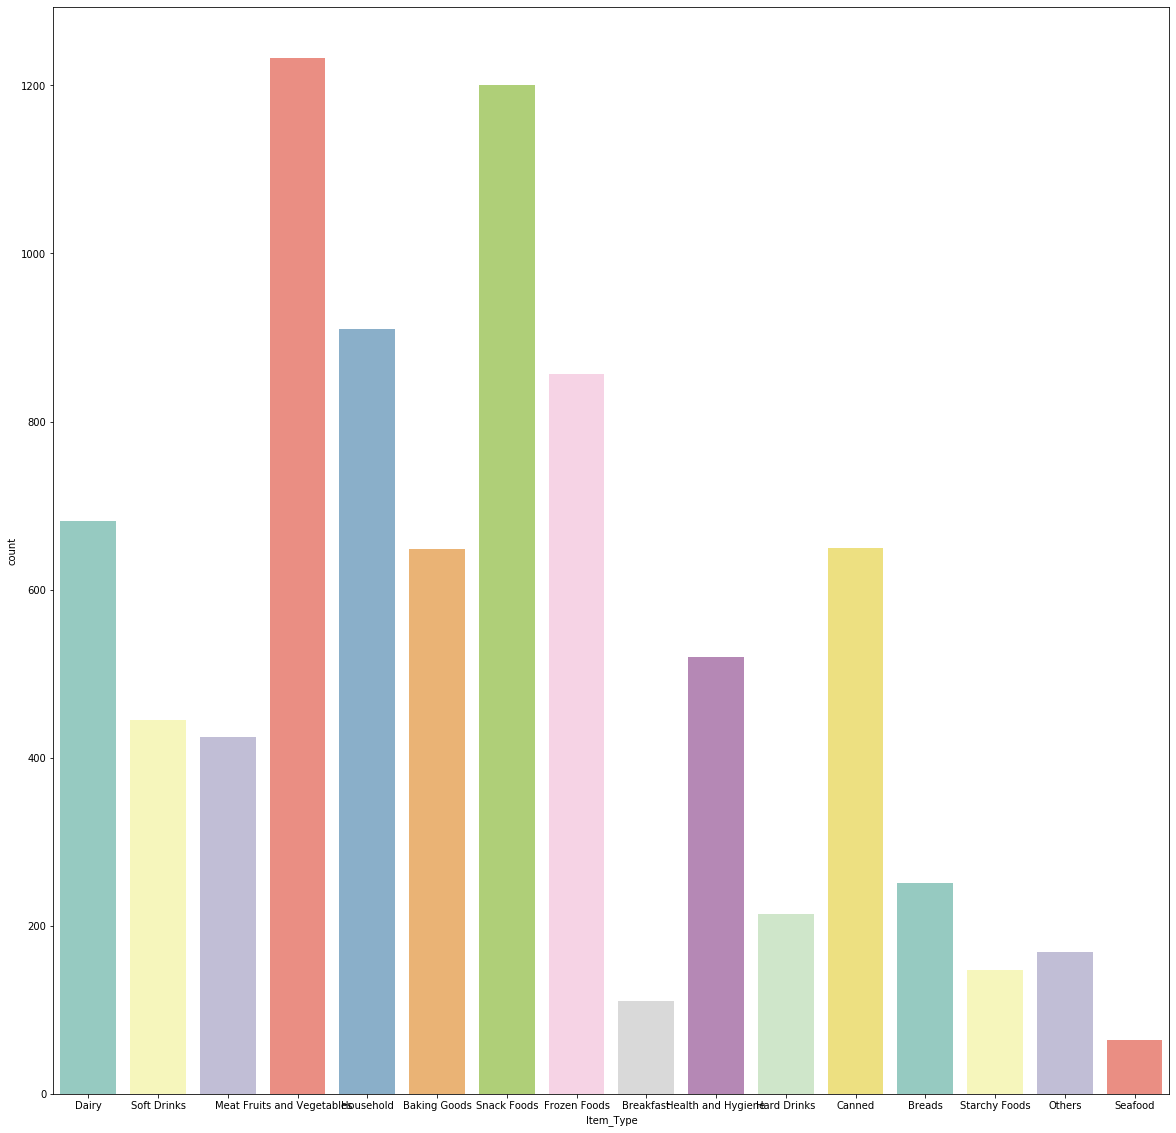

In [28]:
l=list(df_train["Item_Type"].unique())
plt.figure(figsize=[20,20])
chart=sns.countplot(df_train["Item_Type"],palette="Set3")

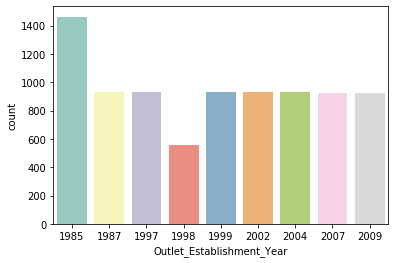

In [29]:
sns.countplot(df_train['Outlet_Establishment_Year'] , palette="Set3")

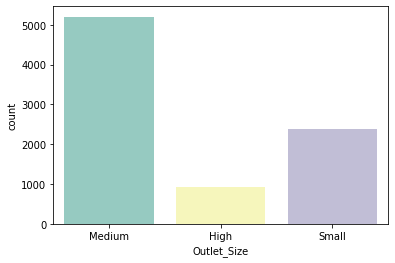

In [30]:
sns.countplot(df_train['Outlet_Size'], palette="Set3")

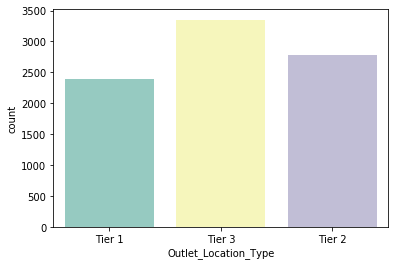

In [31]:
sns.countplot(df_train['Outlet_Location_Type'] , palette="Set3")

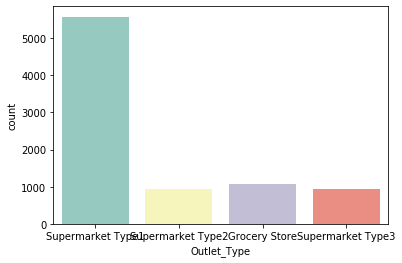

In [32]:
sns.countplot(df_train['Outlet_Type'] , palette = 'Set3')

# CORRELATION MATRIX:-

In [33]:
corr=df_train.corr()

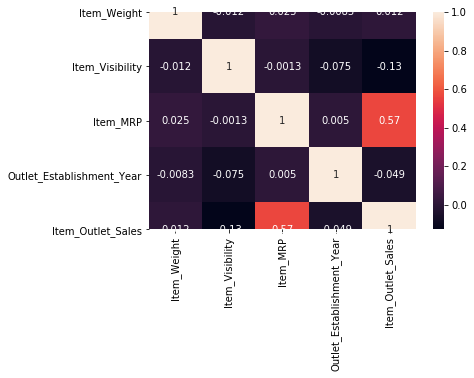

In [34]:
sns.heatmap(corr,annot=True)

In [35]:
corr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.203191,0.156636,0.319207,0.174550,0.280273
std,0.445681,0.474241,0.450920,0.462539,0.486947
min,-0.012049,-0.128625,-0.001315,-0.074834,-0.128625
25%,-0.008301,-0.074834,0.005020,-0.049135,-0.049135
50%,0.011550,-0.012049,0.024756,-0.008301,0.011550
75%,0.024756,-0.001315,0.567574,0.005020,0.567574
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Treating Categorical Values:-

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [37]:
df_train.drop('Item_Identifier',axis=1,inplace=True)

In [38]:
df_test.drop('Item_Identifier',axis=1,inplace=True)

In [39]:
print('Values before Imputing numeric values:',df_train['Item_Fat_Content'].unique())
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].apply(lambda x: x.lower())
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].apply(lambda x:'lf' if x=='low fat' else x )
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].apply(lambda x:'reg' if x=='regular' else x )
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].map({
    'lf':0,
    'reg':1
})
print('Values after Imputing numeric values:',df_train['Item_Fat_Content'].unique())

Values before Imputing numeric values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Values after Imputing numeric values: [0 1]


In [40]:
print('Values before Imputing numeric values:',df_test['Item_Fat_Content'].unique())
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x: x.lower())
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x:'lf' if x=='low fat' else x )
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x:'reg' if x=='regular' else x )
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].map({
    'lf':0,
    'reg':1
})
print('Values after Imputing numeric values:',df_test['Item_Fat_Content'].unique())

Values before Imputing numeric values: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Values after Imputing numeric values: [0 1]


In [41]:
print('Values before Imputing numeric values:', df_train['Outlet_Size'].unique())
df_train['Outlet_Size']=df_train['Outlet_Size'].map({ 'Medium':1,                            
                                'High':2,
                                'Small':3
})
print('Values after Imputing numeric values:' ,df_train['Outlet_Size'].unique())

Values before Imputing numeric values: ['Medium' 'High' 'Small']
Values after Imputing numeric values: [1 2 3]


In [42]:
print('Values before Imputing numeric values:', df_test['Outlet_Size'].unique())
df_test['Outlet_Size']=df_test['Outlet_Size'].map({ 'Medium':1,                            
                                'High':2,
                                'Small':3
})
print('Values after Imputing numeric values:' ,df_test['Outlet_Size'].unique())

Values before Imputing numeric values: ['Medium' 'Small' 'High']
Values after Imputing numeric values: [1 3 2]


In [43]:
print('Values before Imputing :'  ,df_train['Outlet_Location_Type'].unique())
df_train['Outlet_Location_Type']=df_train['Outlet_Location_Type'].map({ 'Tier 1':1,
                                'Tier 3':3,
                                'Tier 2':2   
})
print('Values after Imputing :'  ,df_train['Outlet_Location_Type'].unique())

Values before Imputing : ['Tier 1' 'Tier 3' 'Tier 2']
Values after Imputing : [1 3 2]


In [44]:
print('Values before Imputing :'  ,df_test['Outlet_Location_Type'].unique())
df_test['Outlet_Location_Type']=df_test['Outlet_Location_Type'].map({ 'Tier 1':1,
                                'Tier 3':3,
                                'Tier 2':2   
})
print('Values after Imputing :'  ,df_test['Outlet_Location_Type'].unique())

Values before Imputing : ['Tier 1' 'Tier 2' 'Tier 3']
Values after Imputing : [1 2 3]


In [45]:
print(df_train['Outlet_Type'].unique())
df_train['Outlet_Type']=df_train['Outlet_Type'].map({ 'Supermarket Type1':1,
                                'Supermarket Type2':2,
                                'Grocery Store':3,
                                'Supermarket Type3':4
})
print('Values after Imputing:'  ,df_train['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Values after Imputing: [1 2 3 4]


In [46]:
print(df_test['Outlet_Type'].unique())
df_test['Outlet_Type']=df_test['Outlet_Type'].map({ 'Supermarket Type1':1,
                                'Supermarket Type2':2,
                                'Grocery Store':3,
                                'Supermarket Type3':4
})
print('Values after Imputing:'  ,df_test['Outlet_Type'].unique())

['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
Values after Imputing: [1 3 4 2]


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 732.5+ KB


In [48]:
df_train=pd.get_dummies(df_train, columns= ['Item_Type','Outlet_Identifier','Outlet_Type'],drop_first=True)

Item_Weight


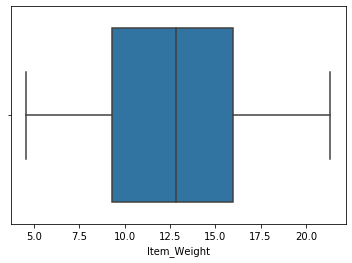

Item_Fat_Content


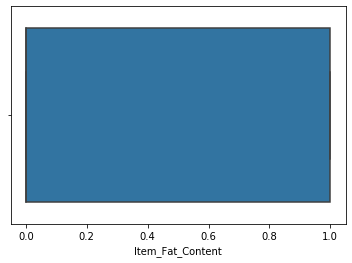

Item_Visibility


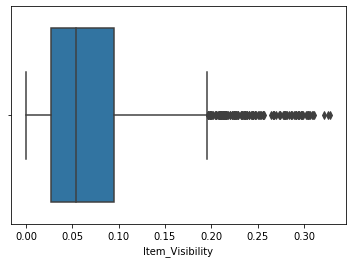

Item_MRP


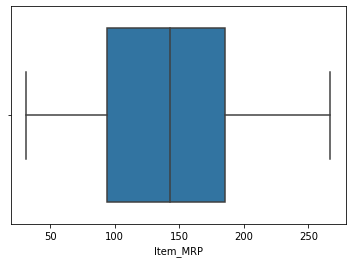

Outlet_Establishment_Year


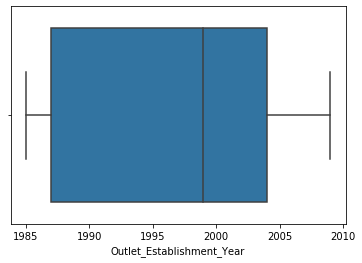

Outlet_Size


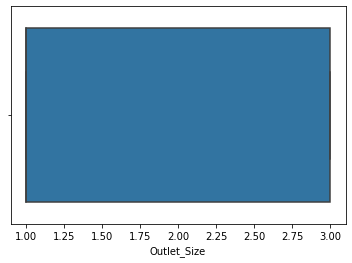

Outlet_Location_Type


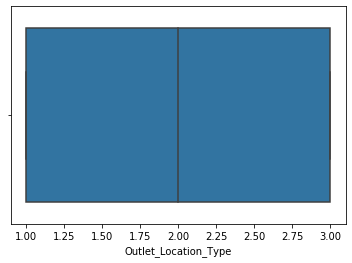

In [49]:
for col in df_train.iloc[:,0:7].columns:
    print(col)
    sns.boxplot(df_train[col])
    plt.show()

We can see that the Item_visibilty column is having outlier so we will treat it.

## Outlier Removal

In [50]:
def boxoutlier(var):
    for x in var.iloc[:,2:3].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df_train=boxoutlier(df_train)

Item_Weight


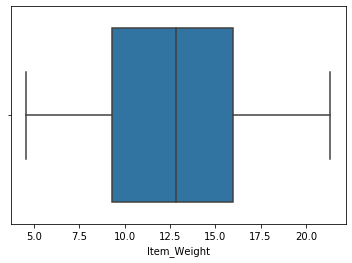

Item_Fat_Content


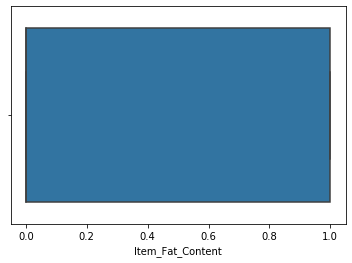

Item_Visibility


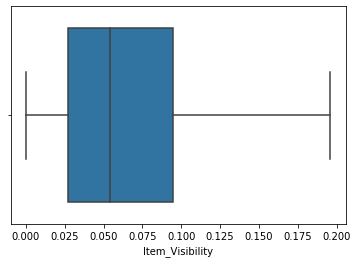

Item_MRP


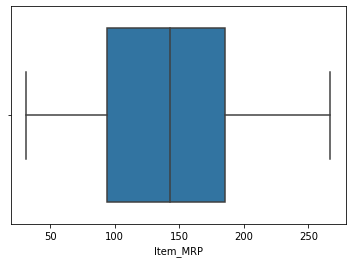

Outlet_Establishment_Year


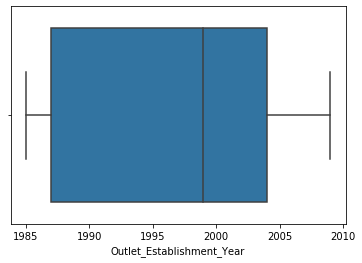

Outlet_Size


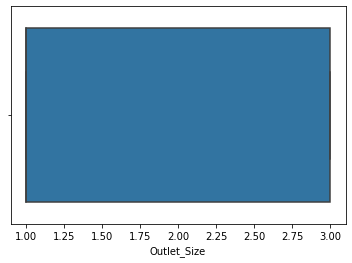

Outlet_Location_Type


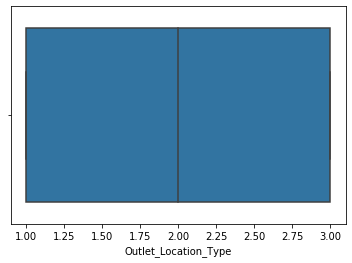

In [51]:
for col in df_train.iloc[:,0:7].columns:
    print(col)
    sns.boxplot(x=df_train[col],data=df_train)
    plt.show()

We can see that the Outlier is Removed

In [52]:
df_train.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
5141,16.70,1,0.052493,113.9176,1999,1,1,2519.3872,0,0,...,0,0,0,0,0,0,1,0,0,0
4710,15.10,0,0.000000,216.4166,2002,1,2,2830.3158,0,0,...,0,0,0,0,1,0,0,0,0,0
5239,14.00,0,0.023832,103.1332,2009,1,3,1948.1308,0,0,...,1,0,0,0,0,0,0,1,0,0
7764,13.30,1,0.071597,60.8536,2002,1,2,918.8040,0,0,...,0,0,0,0,1,0,0,0,0,0
6816,14.15,0,0.095378,170.5106,1997,3,1,2395.5484,0,0,...,0,0,0,0,0,1,0,0,0,0


# Creating train_test_split

In [53]:
x=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [55]:
display(x_train.head(),y_train.head(),'Testing Data',x_test.head(),y_test.head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
7381,12.857645,1,0.053577,122.2072,1985,1,3,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2158,16.850000,1,0.080015,111.8544,2009,1,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1297,9.695000,1,0.047698,244.6144,2007,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,20.250000,0,0.036319,219.3482,2004,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2994,11.600000,1,0.077601,171.0106,2007,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7381    3552.7088
2158    1677.8160
1297    2695.1584
998     5038.1086
2994    3079.9908
Name: Item_Outlet_Sales, dtype: float64

'Testing Data'

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
4476,20.500000,0,0.020588,89.5830,1987,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4192,12.857645,1,0.195979,88.8514,1985,3,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
355,19.250000,1,0.034700,141.7496,1997,3,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8433,11.800000,1,0.057411,149.5366,2004,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
385,15.250000,0,0.026605,86.2198,2004,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


4476    1797.6600
4192     265.6542
355     4093.3384
8433    1813.6392
385      610.5386
Name: Item_Outlet_Sales, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

Text(0, 0.5, 'Predicted Values')

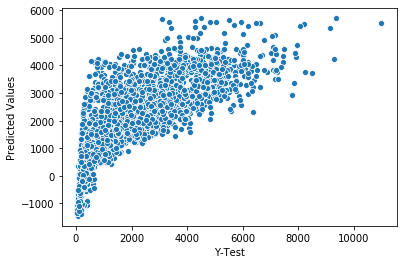

In [58]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

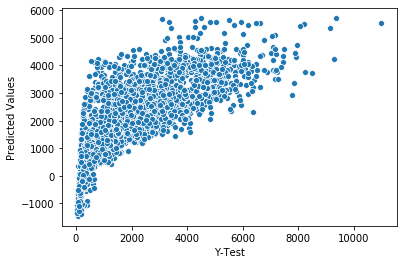

In [59]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
sns.scatterplot(y_test,predr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predcited Values')

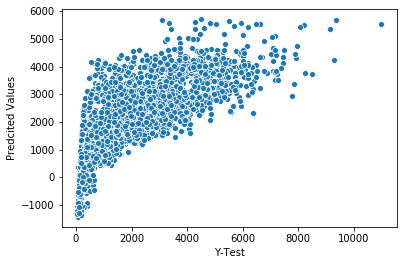

In [60]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
sns.scatterplot(y_test,predl)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

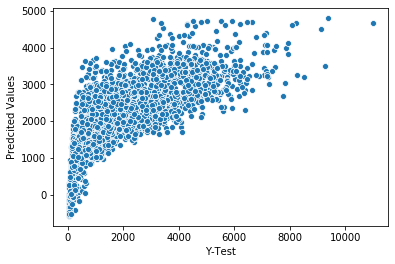

In [61]:
e=ElasticNet()
e.fit(x_train,y_train)
prede=e.predict(x_test)
sns.scatterplot(y_test,prede)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

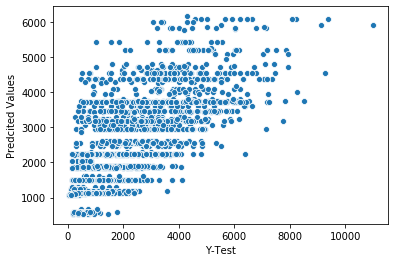

In [62]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
sns.scatterplot(y_test,predada)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predicted Values')

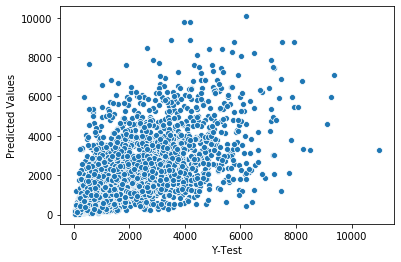

In [63]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
sns.scatterplot(y_test,preddt)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

# Hyper Parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters={'max_depth':[2,5,10,50]}

In [66]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 50]})

Now The Hyper Parameter Tuning is Done we will look go RMSE and MSE

In [67]:
import sklearn.metrics as metrics

In [68]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

MAE: 826.3594159209139
MSE: 1215110.3267194189
RMSE: 1102.3204283326236


In [69]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predr))))

MAE: 826.3529443786839
MSE: 1215061.6398780853
RMSE: 1102.2983443143173


In [70]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predl)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predl)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predl))))

MAE: 825.9773829766181
MSE: 1214345.5668419057
RMSE: 1101.9734873588864


In [71]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prede)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prede)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prede))))

MAE: 868.1998701574265
MSE: 1318363.7783971755
RMSE: 1148.200234452674


In [72]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))

MAE: 918.5996056812421
MSE: 1391845.2541228875
RMSE: 1179.7649147702637


In [73]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preddt)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preddt)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preddt))))

MAE: 1066.044224872898
MSE: 2260115.6973236017
RMSE: 1503.3681177022486
